# <span style="color:red">Monte Carlo Simulation</span>

#### v1.1.0

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

import re
from datetime import date

today = date.today()
li = []                                                           # empty list "li" takes number of days passed

def mcs_int():
  item_count = pbi_count
  loop_count = 0
  while item_count > 0:
    integer = np.random.randint(0, tp_int + 1)
    item_count -= integer
    loop_count += 1
  li.append(loop_count)
  return loop_count

def mcs_float():
  item_count = float(pbi_count)
  loop_count = 0
  while item_count > 0:
    #integer = np.random.randint(0, tp_int + 1)
    float_num = np.random.uniform(tp_float) # new
    #item_count -= integer
    item_count -= float_num
    loop_count += 1
  li.append(loop_count)
  return loop_count

pbi_count = int(input("input item count: "))                      # the variable "x" takes the item count input, which basically
intended_runs = int(input("input number of intended MCS runs: ")) # select number of simulation runs

while True:
    test_var = input("Select a TP: Is your TP is higher than 1 select [y/n]: ")
    if test_var == "y":
        tp_int = int(input("input work item Throughput (TP): ")) # select the teams work item throughput
        for i in range(intended_runs):
          mcs_int()
        tp = tp_int
        break
    elif test_var == "n":
        tp_float = float(input("input work item Throughput (TP): "))
        for i in range(intended_runs):
          mcs_float()
        tp = tp_float
        break
    else:
        print("Your answer was neither 'yes' nor 'no'! Please choose!")
    
print(li)

input item count: 50
input number of intended MCS runs: 1000
Select a TP: Is your TP is higher than 1 select [y/n]: y
input work item Throughput (TP): 3
[40, 33, 33, 37, 36, 34, 36, 31, 31, 31, 43, 40, 29, 28, 31, 31, 36, 36, 37, 36, 37, 36, 33, 35, 33, 35, 28, 36, 41, 34, 28, 33, 30, 37, 37, 32, 33, 37, 35, 39, 35, 37, 35, 37, 33, 26, 36, 35, 38, 33, 36, 32, 34, 30, 37, 27, 38, 30, 36, 28, 28, 36, 35, 31, 31, 30, 30, 37, 34, 35, 30, 38, 34, 35, 35, 33, 33, 34, 32, 31, 34, 30, 36, 30, 28, 34, 34, 35, 31, 35, 36, 38, 36, 35, 32, 37, 27, 28, 32, 33, 34, 33, 30, 41, 30, 34, 28, 33, 33, 34, 34, 39, 28, 37, 30, 34, 37, 38, 39, 35, 40, 34, 36, 32, 29, 36, 33, 32, 28, 43, 31, 36, 34, 32, 40, 31, 26, 33, 31, 38, 32, 40, 34, 28, 31, 30, 36, 29, 39, 29, 39, 37, 37, 32, 37, 33, 25, 32, 32, 37, 31, 29, 34, 33, 31, 29, 34, 31, 45, 32, 30, 36, 36, 35, 31, 31, 35, 35, 34, 30, 29, 36, 32, 33, 34, 27, 38, 31, 39, 35, 35, 36, 30, 32, 29, 25, 38, 30, 36, 34, 41, 38, 42, 35, 34, 33, 30, 35, 28, 30, 35, 32

In [2]:
mcs_series = pd.Series(li, name="Monte Carlo Simulation")

In [3]:
mcs_series.info(), mcs_series.describe()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Monte Carlo Simulation
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


(None,
 count    1000.000000
 mean       33.565000
 std         4.152471
 min        23.000000
 25%        31.000000
 50%        33.000000
 75%        36.000000
 max        48.000000
 Name: Monte Carlo Simulation, dtype: float64)

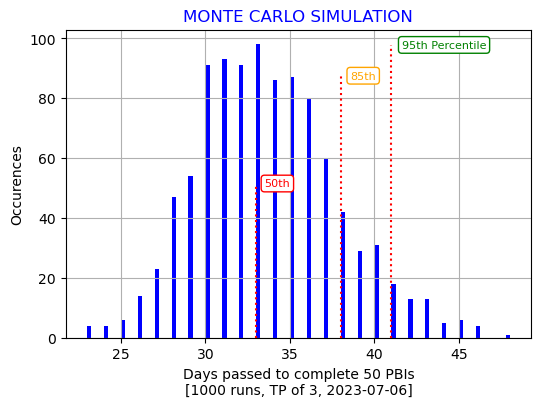

In [4]:
fig, ax = plt.subplots(figsize=(6,4))
mcs_series.plot(kind="hist", color="blue", alpha=1, bins=100)
#mcs_series.plot(kind="kde")

y_lim = ax.get_ylim()
y = y_lim[1]
y_lim, y

quant_50, quant_85, quant_95 = mcs_series.quantile(0.5), mcs_series.quantile(0.85), mcs_series.quantile(0.95)
quant_50, quant_85, quant_95

x_50 = quant_50 + (quant_50 * 0.015)
x_85 = quant_85 + (quant_85 * 0.015)
x_95 = quant_95 + (quant_95 * 0.015)
y_50 = y - (y * 0.5)
y_85 = y - (y * 0.15)
y_95 = y - (y * 0.05)

quants = [[quant_50, 1, 0.5], [quant_85, 1, 0.85], [quant_95, 1, 0.95]]
for i in quants:
  plt.axvline(i[0], alpha=i[1], ymax=i[2], linestyle=":", color="red")

ax.text(x_50, y_50, "50th", horizontalalignment="left", verticalalignment="center", size=8, alpha=1, color="red",
        bbox=dict(facecolor="white", edgecolor="red", boxstyle="round"))
ax.text(x_85, y_85, "85th", horizontalalignment="left", verticalalignment="center", size=8, alpha=1, color="orange",
        bbox=dict(facecolor="white", edgecolor="orange", boxstyle='round'))
ax.text(x_95, y_95, "95th Percentile",  horizontalalignment="left", verticalalignment="center",size=8, alpha=1, color="green",
        bbox=dict(facecolor="white", edgecolor="green", boxstyle="round"))


ax.set(title="MONTE CARLO SIMULATION", xlabel=f"Days passed to complete {pbi_count} PBIs\n[{intended_runs} runs, TP of {tp}, {today}]", ylabel="Occurences")
ax.title.set_color("blue")
ax.xaxis.label.set_color("black")
ax.yaxis.label.set_color("black")
plt.grid(True)
plt.show()

In [ ]:
ax.get_ylim()

(0.0, 6861.75)

Text(0, 0.5, 'Occurences')

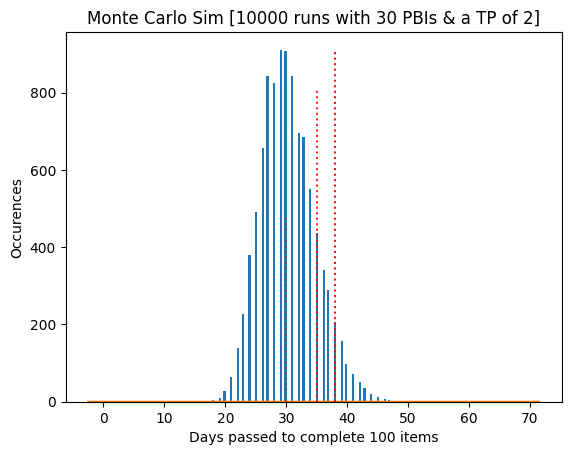

In [ ]:
mcs_series.plot(kind="hist", alpha=1, bins=100)
#mcs_series.plot(kind="kde")
quants = [[quant_50, 1, 0.5], [quant_85, 1, 0.85], [quant_95, 1, 0.95]]
for i in quants:
  #plt.axhline(y=10000, linestyle=":", color="r")
  plt.axvline(i[0], alpha=i[2], ymax=i[2], linestyle=":", color="r")

#plt.axhline(y=26000, xmax=0.48, linestyle=":", color="r")
plt.title(f"Monte Carlo Sim [{intended_runs} runs with {pbi_count} PBIs & a TP of {tp}]")
plt.xlabel("Days passed to complete 100 items")
plt.ylabel("Occurences")
#plt.title(f"MONTE CARLO SIMULATION", color="blue")
#plt.xlabel(f"Days passed to complete {pbi_count} PBIs\n[{intended_runs} runs, TP of {tp}]", color="blue")
#plt.ylabel("Occurences", color="blue")
#plt.show()